# **<font color=#8e44ad>House Prices Prediction</font>**

This project is based on the Kaggle competition "House Prices - Advanced Regression Techniques". 

As mentioned on Kaggle, acknowledgments goes to Dean De Cock who collected this data for a use in data science education.

**<font color=#ff7400>Objective</font>**:

The main goal is to predict the price of a house based on different available feature. The loss function retained for final evaluation is the Root-Mean-Squared-Error (RMSE) "between the logarithm of the predicted value and the logarithm of the observed sales price".  


In [1]:
# importing needed libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **<font color=#8e44ad>Exploratory Data Analysis</font>**

### **<font color=#8e44ad>Dataset Overview</font>**

In this section we will have a first look at our data in order to understand the basics of our use case.

In [2]:
# full path to the file to access the file
file_path = "/Users/julien/Documents/EPITA/S2/DSP/dsp-julien-guyet/data/house-prices-advanced-regression-techniques/train.csv"

# opening CSV file with pandas and saving as dataframe
df = pd.read_csv(file_path)

In [3]:
# printing first 5 rows of dataset

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see, the dataset has 81 columns. This is a huge amount of feature, and we are not sure all of them can be relevant when creating our model. Let's have a look at the documentation provided with the dataset in order to have a better understanding

In [4]:
'''
Below are the following columns to pick for a first try after reading the documentation.
Decisions were taken essentially using common sense: what matter the most when buying a house are: its price, size, global status (do I need to renovate after purchase?), 
what about energy consumption, and finally is there any additional features in this house compare to another one (pool, cellar, extra rooms, etc.).ipynb_checkpoints/

Columns for a first try:

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MoSold: Month Sold (MM)

'''

'\nBelow are the following columns to pick for a first try after reading the documentation.\nDecisions were taken essentially using common sense: what matter the most when buying a house are: its price, size, global status (do I need to renovate after purchase?), \nwhat about energy consumption, and finally is there any additional features in this house compare to another one (pool, cellar, extra rooms, etc.).ipynb_checkpoints/\n\nColumns for a first try:\n\nLotFrontage: Linear feet of street connected to property\n\nLotArea: Lot size in square feet\n\nLandSlope: Slope of property\n\t\t\n       Gtl\tGentle slope\n       Mod\tModerate Slope\t\n       Sev\tSevere Slope\n\nOverallQual: Rates the overall material and finish of the house\n\nOverallCond: Rates the overall condition of the house\n\nYearRemodAdd: Remodel date (same as construction date if no remodeling or additions)\n\nExterQual: Evaluates the quality of the material on the exterior \n\t\t\n       Ex\tExcellent\n       Gd\tGoo

In [5]:
# listing columns we would like to keep
columns_to_keep = ["LotFrontage", "LotArea", "LandSlope", "OverallQual", "OverallCond", "YearRemodAdd", "ExterQual", "ExterCond", "HeatingQC", "CentralAir", "1stFlrSF",
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "GarageQual", "GarageCond", "PoolQC", "Fence", "MoSold", "SalePrice"]

df_key_columns = df[columns_to_keep]


In [6]:
df_key_columns.head(5)

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,HeatingQC,CentralAir,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageQual,GarageCond,PoolQC,Fence,MoSold,SalePrice
0,65.0,8450,Gtl,7,5,2003,Gd,TA,Ex,Y,...,3,1,Gd,8,TA,TA,NaN,NaN,2,208500
1,80.0,9600,Gtl,6,8,1976,TA,TA,Ex,Y,...,3,1,TA,6,TA,TA,NaN,NaN,5,181500
2,68.0,11250,Gtl,7,5,2002,Gd,TA,Ex,Y,...,3,1,Gd,6,TA,TA,NaN,NaN,9,223500
3,60.0,9550,Gtl,7,5,1970,TA,TA,Gd,Y,...,3,1,Gd,7,TA,TA,NaN,NaN,2,140000
4,84.0,14260,Gtl,8,5,2000,Gd,TA,Ex,Y,...,4,1,Gd,9,TA,TA,NaN,NaN,12,250000


In [7]:
df_key_columns.dtypes

LotFrontage     float64
LotArea           int64
LandSlope        object
OverallQual       int64
OverallCond       int64
YearRemodAdd      int64
ExterQual        object
ExterCond        object
HeatingQC        object
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MoSold            int64
SalePrice         int64
dtype: object

In [8]:
# now let's have a look at which columns contain numerical values and which have continuous data

numerical_cols = df_key_columns.select_dtypes(include=['int64', 'float64'])

# Continuous columns are numerical and non-null
continuous_cols = df_key_columns.select_dtypes(exclude=['int64', 'float64'])

print("Numerical variables:")
print(numerical_cols.columns.tolist())

print("---------------------------")
print("Continuous variables")
print(continuous_cols.columns.tolist())

# checking we have a total column of 23. If not that means some columns handle a different type of data 
print(f"total columns: {len(continuous_cols.columns.tolist()) + len(numerical_cols.columns.tolist())}")

Numerical variables:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'MoSold', 'SalePrice']
---------------------------
Continuous variables
['LandSlope', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
total columns: 24


Now we will check if our dataset has any missing value. 

In [9]:
for column in df_key_columns.columns:
    null_sum = df_key_columns[column].isnull().sum()

    if null_sum > 0:
        print(f"The '{column}' column has {null_sum} null values.")
    else:
        print(f"The '{column}' column has no null values.")

print(f"Number of rows in the dataset: {df_key_columns.shape[0]}")

The 'LotFrontage' column has 259 null values.
The 'LotArea' column has no null values.
The 'LandSlope' column has no null values.
The 'OverallQual' column has no null values.
The 'OverallCond' column has no null values.
The 'YearRemodAdd' column has no null values.
The 'ExterQual' column has no null values.
The 'ExterCond' column has no null values.
The 'HeatingQC' column has no null values.
The 'CentralAir' column has no null values.
The '1stFlrSF' column has no null values.
The '2ndFlrSF' column has no null values.
The 'LowQualFinSF' column has no null values.
The 'GrLivArea' column has no null values.
The 'BedroomAbvGr' column has no null values.
The 'KitchenAbvGr' column has no null values.
The 'KitchenQual' column has no null values.
The 'TotRmsAbvGrd' column has no null values.
The 'GarageQual' column has 81 null values.
The 'GarageCond' column has 81 null values.
The 'PoolQC' column has 1453 null values.
The 'Fence' column has 1179 null values.
The 'MoSold' column has no null va

Good news is we do not have too many missing value as only the LotFrontage column is concerned. That said, it still represents 17% of our data. We will replace missing values with the median here, to avoid outliers to have a too big impact. 

In [10]:
df_key_columns['LotFrontage'] = df_key_columns['LotFrontage'].fillna(df_key_columns['LotFrontage'].median())

/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/917380593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['LotFrontage'] = df_key_columns['LotFrontage'].fillna(df_key_columns['LotFrontage'].median())


In [11]:
for column in df_key_columns.columns:
    null_sum = df_key_columns[column].isnull().sum()

    if null_sum > 0:
        print(f"The '{column}' column has {null_sum} null values.")
    else:
        print(f"The '{column}' column has no null values.")

print(f"Number of rows in the dataset: {df_key_columns.shape[0]}")

The 'LotFrontage' column has no null values.
The 'LotArea' column has no null values.
The 'LandSlope' column has no null values.
The 'OverallQual' column has no null values.
The 'OverallCond' column has no null values.
The 'YearRemodAdd' column has no null values.
The 'ExterQual' column has no null values.
The 'ExterCond' column has no null values.
The 'HeatingQC' column has no null values.
The 'CentralAir' column has no null values.
The '1stFlrSF' column has no null values.
The '2ndFlrSF' column has no null values.
The 'LowQualFinSF' column has no null values.
The 'GrLivArea' column has no null values.
The 'BedroomAbvGr' column has no null values.
The 'KitchenAbvGr' column has no null values.
The 'KitchenQual' column has no null values.
The 'TotRmsAbvGrd' column has no null values.
The 'GarageQual' column has 81 null values.
The 'GarageCond' column has 81 null values.
The 'PoolQC' column has 1453 null values.
The 'Fence' column has 1179 null values.
The 'MoSold' column has no null val

### **<font color=#8e44ad>Univariate Analysis</font>**

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


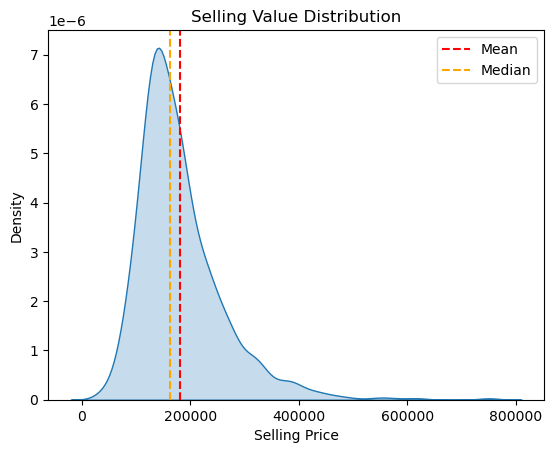

In [12]:
# plotting prices distribution

mean_value = df_key_columns['SalePrice'].mean()
median_value = df_key_columns['SalePrice'].median()

plt.title('Selling Value Distribution')
sns.kdeplot(df_key_columns['SalePrice'], fill = True)

plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_value, color='orange', linestyle='dashed', label='Median')

plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

As we can see distribution is not perfectly centered, and the mean is influenced by some extrema in saling prices.

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


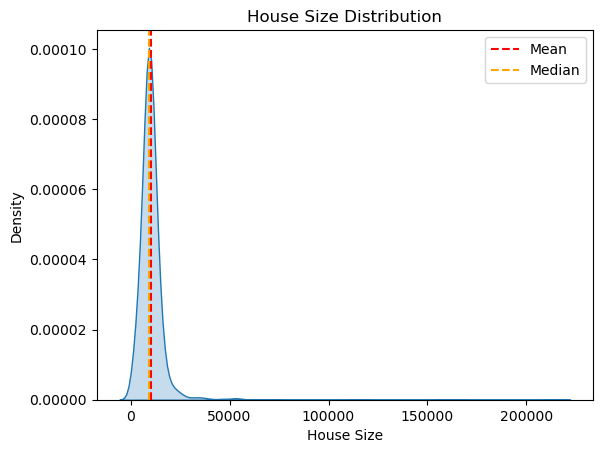

In [13]:
# plotting house size (in sqF) distribution

mean_value = df_key_columns['LotArea'].mean()
median_value = df_key_columns['LotArea'].median()

plt.title('House Size Distribution')
sns.kdeplot(df_key_columns['LotArea'], fill = True)

plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_value, color='orange', linestyle='dashed', label='Median')

plt.xlabel('House Size')
plt.ylabel('Density')
plt.legend()
plt.show()

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


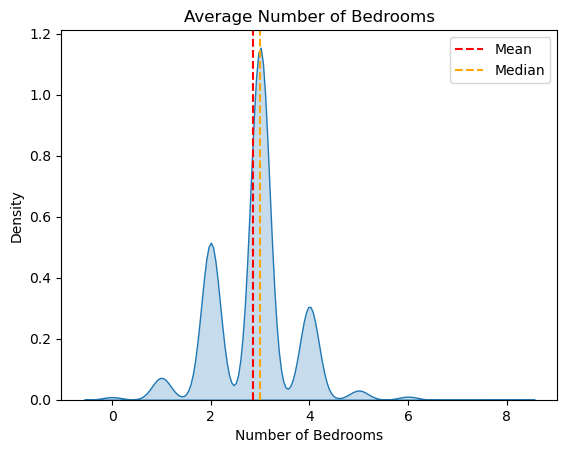

In [14]:
# plotting number of bedrooms on average

mean_value = df_key_columns['BedroomAbvGr'].mean()
median_value = df_key_columns['BedroomAbvGr'].median()

plt.title('Average Number of Bedrooms')
sns.kdeplot(df_key_columns['BedroomAbvGr'], fill = True)

plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_value, color='orange', linestyle='dashed', label='Median')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Density')
plt.legend()
plt.show()

Despite being very close to eachother's, there is a gap between the median and the mean. It is obvious that we have more houses with 3 bedrooms or less than the opposite. Especially 2 vs 4, which is explaining why our mean is being pulled down. 

### **<font color=#8e44ad>Encoding</font>**

In this section we will encode our text into numerical values. In order to do this, we will (i) look at the unique values of each column and (ii) evaluate the logical link that can be established.

In [15]:
# storing columns with text
columns_to_print = continuous_cols.columns.tolist()

# printing each column with corresponding unique values
for col in columns_to_print:
    print(f"Column '{col}':")
    print(f"- Unique values: {df_key_columns[col].unique()}")

Column 'LandSlope':
- Unique values: ['Gtl' 'Mod' 'Sev']
Column 'ExterQual':
- Unique values: ['Gd' 'TA' 'Ex' 'Fa']
Column 'ExterCond':
- Unique values: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Column 'HeatingQC':
- Unique values: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Column 'CentralAir':
- Unique values: ['Y' 'N']
Column 'KitchenQual':
- Unique values: ['Gd' 'TA' 'Ex' 'Fa']
Column 'GarageQual':
- Unique values: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Column 'GarageCond':
- Unique values: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Column 'PoolQC':
- Unique values: [nan 'Ex' 'Fa' 'Gd']
Column 'Fence':
- Unique values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [16]:
# guidelines for LandSlope:

'''
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

--> we can deduct from this there is a logical order. So we can go for ordinal encoding with Gentle slope at 0 and Severe Slope at 2

'''

def transform_slope(value):

    if value == 'Gtl':
        return 0
    elif value == 'Mod':
        return 1
    else:
        return 2

df_key_columns['LandSlope'] = df_key_columns['LandSlope'].apply(transform_slope)

print(df_key_columns['LandSlope'].unique())


[0 1 2]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/2414742782.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['LandSlope'] = df_key_columns['LandSlope'].apply(transform_slope)


In [17]:
# guidelines for ExterQual:
'''
ExterQual: Evaluates the quality of the material on the exterior 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

--> we can deduct from this there is a logical order. So we can go for ordinal encoding with Excellent as the max and Poor as the min (0)

'''

def transform_ExterQual(value):

    if value == 'Ex':
        return 4
    elif value == 'Gd':
        return 3
    elif value == 'TA':
        return 2
    elif value == 'Fa':
        return 1
    else:
        return 0

df_key_columns['ExterQual'] = df_key_columns['ExterQual'].apply(transform_ExterQual)

print(df_key_columns['ExterQual'].unique())


[3 2 4 1]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/249672529.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['ExterQual'] = df_key_columns['ExterQual'].apply(transform_ExterQual)


In [18]:
# guidelines for ExterCond:
'''
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

--> we can deduct from this there is a logical order. So we can go for ordinal encoding with Excellent as the max and Poor as the min (0)

'''

def transform_ExterCond(value):

    if value == 'Ex':
        return 4
    elif value == 'Gd':
        return 3
    elif value == 'TA':
        return 2
    elif value == 'Fa':
        return 1
    else:
        return 0

df_key_columns['ExterCond'] = df_key_columns['ExterCond'].apply(transform_ExterCond)

print(df_key_columns['ExterCond'].unique())


[2 3 1 0 4]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/659254015.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['ExterCond'] = df_key_columns['ExterCond'].apply(transform_ExterCond)


In [19]:
# guidelines for HeatingQC:
'''
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

--> we can deduct from this there is a logical order. So we can go for ordinal encoding with Excellent as the max and Poor as the min (0)

'''

def transform_HeatingQC(value):

    if value == 'Ex':
        return 4
    elif value == 'Gd':
        return 3
    elif value == 'TA':
        return 2
    elif value == 'Fa':
        return 1
    else:
        return 0

df_key_columns['HeatingQC'] = df_key_columns['HeatingQC'].apply(transform_HeatingQC)

print(df_key_columns['HeatingQC'].unique())


[4 3 2 1 0]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/3535438305.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['HeatingQC'] = df_key_columns['HeatingQC'].apply(transform_HeatingQC)


In [20]:
# guidelines for CentralAir:
'''
CentralAir: Central air conditioning

       N	No
       Y	Yes

--> binary (1 or 0) so ordinal encoding

as reminder our unique values are:
Column 'CentralAir':
- Unique values: ['Y' 'N']

'''

def yes_or_no(value):

    if value == 'Y':
        return 1
    else:
        return 0

df_key_columns['CentralAir'] = df_key_columns['CentralAir'].apply(yes_or_no)

print(df_key_columns['CentralAir'].unique())


[1 0]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/2526975440.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['CentralAir'] = df_key_columns['CentralAir'].apply(yes_or_no)


In [21]:
# guidelines for KitchenQual:
'''
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

--> logical order --> binary encoding

'''

def quality(value):

    if value == 'Ex':
        return 4
    elif value == 'Gd':
        return 3
    elif value == 'TA':
        return 2
    elif value == 'Fa':
        return 1
    else:
        return 0

df_key_columns['KitchenQual'] = df_key_columns['KitchenQual'].apply(quality)

print(df_key_columns['KitchenQual'].unique())


[3 2 4 1]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/1764148057.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['KitchenQual'] = df_key_columns['KitchenQual'].apply(quality)


In [22]:
# GarageQual and GarageCond are based on same logic below:
'''
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

 --> there is a logical order but here the question is: is it worst to have no garage or one in poor quality? By default, for our first try, we will set both of these values to 0
'''

def quality(value):

    if value == 'Ex':
        return 4
    elif value == 'Gd':
        return 3
    elif value == 'TA':
        return 2
    elif value == 'Fa':
        return 1
    else:
        return 0

df_key_columns['GarageQual'] = df_key_columns['GarageQual'].apply(quality)
df_key_columns['GarageCond'] = df_key_columns['GarageCond'].apply(quality)

print(f"unique values for Garage Quality: {df_key_columns['GarageQual'].unique()}")
print(f"unique values for Garage Condition: {df_key_columns['GarageCond'].unique()}")

unique values for Garage Quality: [2 1 3 0 4]
unique values for Garage Condition: [2 1 0 3 4]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/2666735807.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['GarageQual'] = df_key_columns['GarageQual'].apply(quality)
/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/2666735807.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['GarageCond'] = df_key_columns['GarageCond'].apply(quality)


In [23]:
# Guidelines for PoolQC:
'''
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

 --> there is a logical order and this time no "poor" so we can cast NA as 0
'''

df_key_columns['PoolQC'] = df_key_columns['PoolQC'].apply(quality)
print(f"unique values for Pool Quality: {df_key_columns['PoolQC'].unique()}")

unique values for Pool Quality: [0 4 1 3]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/3882828694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['PoolQC'] = df_key_columns['PoolQC'].apply(quality)


In [24]:
# storing columns with text
columns_to_print = continuous_cols.columns.tolist()

# printing each column with corresponding unique values
for col in columns_to_print:
    print(f"Column '{col}':")
    print(f"- Unique values: {df_key_columns[col].unique()}")

Column 'LandSlope':
- Unique values: [0 1 2]
Column 'ExterQual':
- Unique values: [3 2 4 1]
Column 'ExterCond':
- Unique values: [2 3 1 0 4]
Column 'HeatingQC':
- Unique values: [4 3 2 1 0]
Column 'CentralAir':
- Unique values: [1 0]
Column 'KitchenQual':
- Unique values: [3 2 4 1]
Column 'GarageQual':
- Unique values: [2 1 3 0 4]
Column 'GarageCond':
- Unique values: [2 1 0 3 4]
Column 'PoolQC':
- Unique values: [0 4 1 3]
Column 'Fence':
- Unique values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [25]:
# Guidelines for Fence:
'''
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

 --> there is a logical order and this time no "poor" so we can cast NA as 0
'''

def fence_quality(value):

    if value == 'GdPrv':
        return 4
    elif value == 'GdWo':
        return 3
    elif value == 'MnWw':
        return 2
    elif value == 'MnPrv':
        return 1
    else:
        return 0

df_key_columns['Fence'] = df_key_columns['Fence'].apply(fence_quality)
print(f"unique values for Fence Quality: {df_key_columns['Fence'].unique()}")

unique values for Fence Quality: [0 1 3 4 2]


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1419/1170694219.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_columns['Fence'] = df_key_columns['Fence'].apply(fence_quality)


### **<font color=#8e44ad>Multivariate Analysis</font>**

Now, we will compare features together and try to understand the links that can exist between them.

In [26]:
df_key_columns.columns

Index(['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MoSold', 'SalePrice'],
      dtype='object')

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

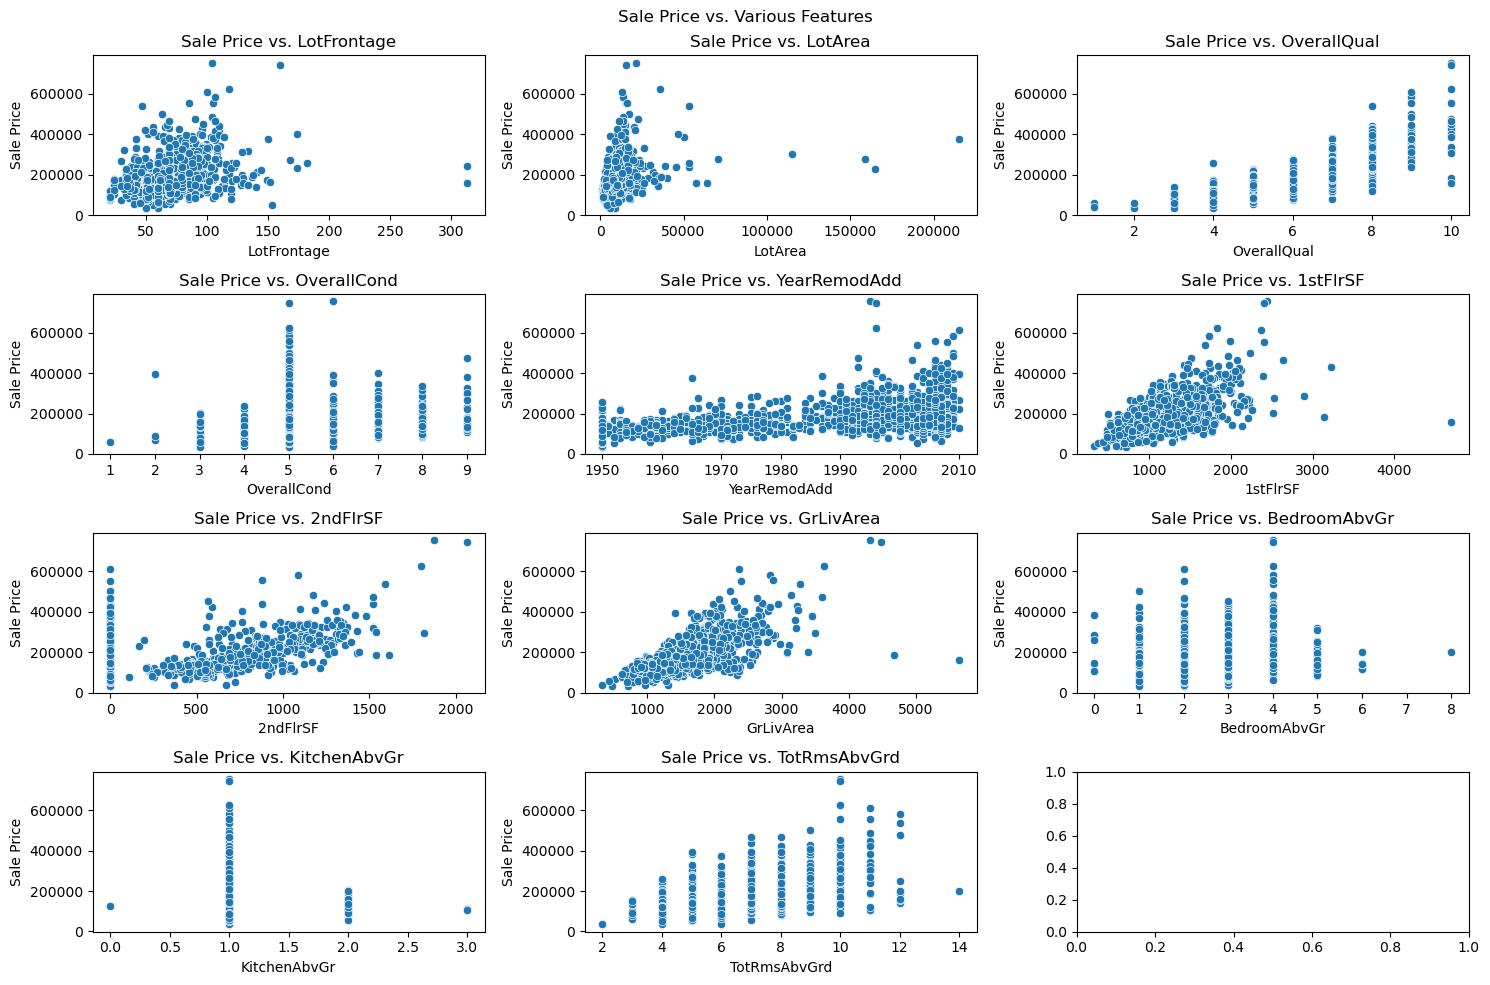

In [27]:
# we will pairplot the sale price alongside other features to confirm our intuition:
# the bigger and furnished the house, the higher should be the price

# list of columns to plot (excluding SalePrice)
columns_to_plot = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']

# Calculate the number of rows and columns for the subplot grid
num_columns = 3
num_rows = int(len(columns_to_plot) / num_columns) + (len(columns_to_plot) % num_columns > 0)


fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Loop through each column and create a scatter plot on the corresponding subplot
plot_counter = 0
for i in range(num_rows):
    for j in range(num_columns):

        if plot_counter >= len(columns_to_plot):
            break

        col = columns_to_plot[plot_counter]
        sns.scatterplot(x=col, y='SalePrice', data=df_key_columns, ax=axes[i, j])
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Sale Price')
        title = f'Sale Price vs. {col}'
        axes[i, j].set_title(title)
        plot_counter += 1

fig.suptitle(f"Sale Price vs. Various Features",fontsize=12)
plt.tight_layout()
plt.show()


Using those graph confirms our intuition: price is influenced not only by the size of the house but also its features. 
We can also notice the existence of some outliers in our data. Let's use boxplot to have a batter view.

/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

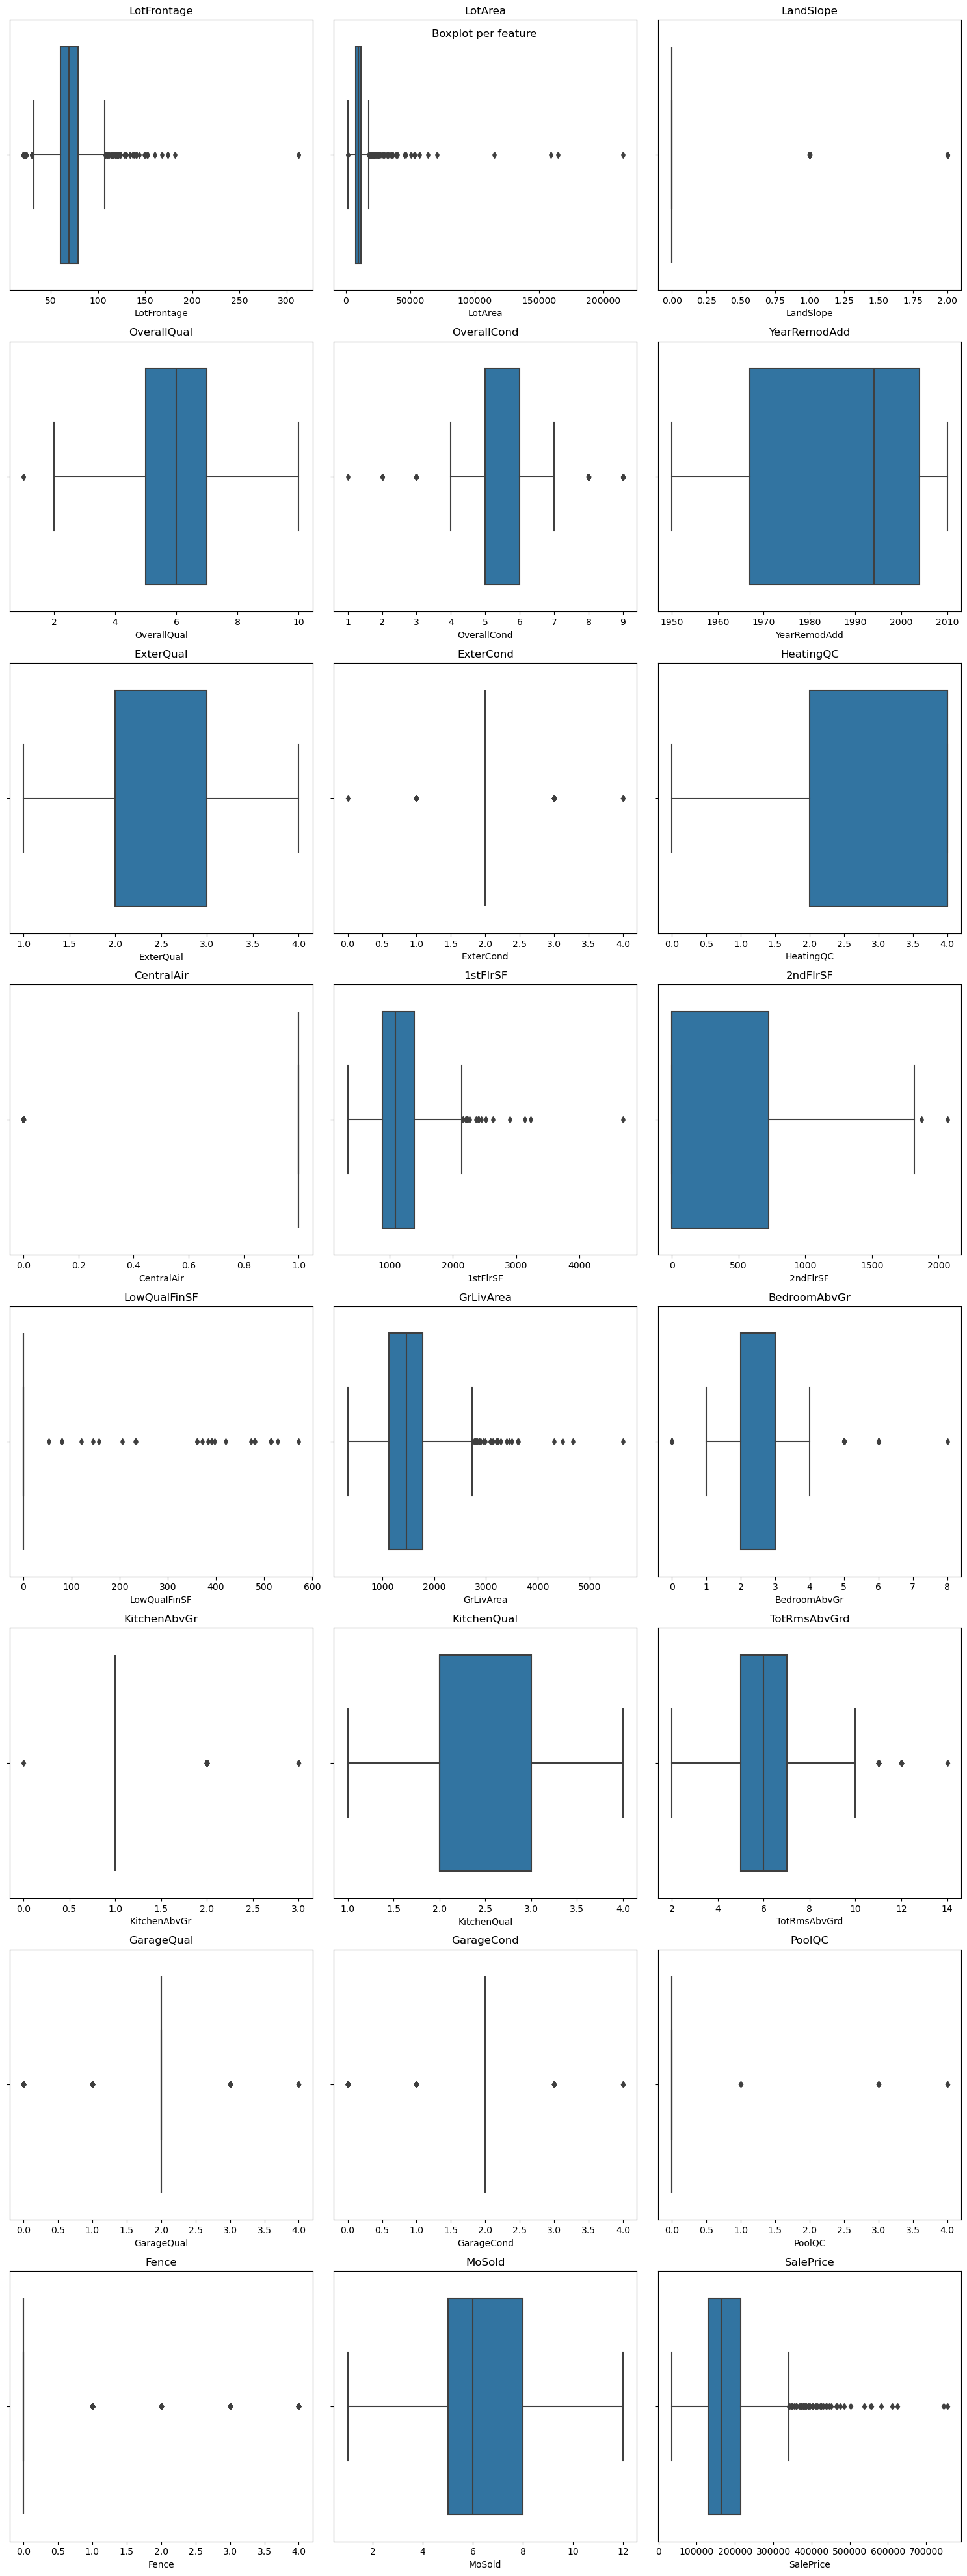

In [28]:
# list of columns to plot
columns_to_plot = df_key_columns.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = len(columns_to_plot) // 3 + (len(columns_to_plot) % 3 > 0)
num_cols = min(len(columns_to_plot), 3)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Boxplot per feature", fontsize=12)

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

plot_counter = 0

for column, ax in zip(columns_to_plot, axes):

    sns.boxplot(x=df_key_columns[column], ax=ax)
    ax.set_title(column)

    plot_counter += 1

plt.tight_layout()
plt.show()


As we can see, we have many outliers for some of our features. Problem is outliers have most of the time (if not always) a bad influence on the quality of the predictions of a ML model (and more especially linear regression). 

For now, we will not drop them but rather select a model which is more robust to outliers than the classic Linear Regression.

### **<font color=#8e44ad>Building and training the Model</font>**

In this section we will train a Linear Regression on our train dataset.

We know the metric used to asset the model quality will be the Root-Mean-Squarred-Error (RMSE) which is the quadratic mean of the differences between the observed values and the predicted values. Therefore, this error should be as close to 0 as possible.

In order to minimize the impact of outliers, we will first scale the data using MinMaxScaler from sklearn. This module transform the data by scaling each feature in a range from 0 and 1. 

In [29]:
# importing needed libraries for sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [30]:
data = pd.DataFrame(df_key_columns)

data.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,HeatingQC,CentralAir,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageQual,GarageCond,PoolQC,Fence,MoSold,SalePrice
0,65.0,8450,0,7,5,2003,3,2,4,1,...,3,1,3,8,2,2,0,0,2,208500
1,80.0,9600,0,6,8,1976,2,2,4,1,...,3,1,2,6,2,2,0,0,5,181500
2,68.0,11250,0,7,5,2002,3,2,4,1,...,3,1,3,6,2,2,0,0,9,223500
3,60.0,9550,0,7,5,1970,2,2,3,1,...,3,1,3,7,2,2,0,0,2,140000
4,84.0,14260,0,8,5,2000,3,2,4,1,...,4,1,3,9,2,2,0,0,12,250000


In [31]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# here we will split to have a validation set  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=42)

In [32]:
# using MinMaxScaler rather than StandardScaler as it linearly scale the dataset and therefore minimize the impact of outliers
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

We will first try to run a classic linear regression, using sklearn.

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# running the prediction

# Predict on training data
y_pred_train = model.predict(X_train)  

# Predict on testing data
y_pred_test = model.predict(X_val)

In [36]:
# accuracy score for train
print(f"This is the accuracy for the train data, using Linear Regression: {model.score(X_train, y_train)}")

# accuracy score for test
print(f"This is the accuracy for the test data, using Linear Regression: {model.score(X_val, y_val)}")

This is the accuracy for the train data, using Linear Regression: 0.7824857047002857
This is the accuracy for the test data, using Linear Regression: 0.7575059543559092


In [37]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

rmse = compute_rmsle(y_val, y_pred_test, precision=2)

print(f"This is the RMSE for the Linear Regression: {rmse}")

This is the RMSE for the Linear Regression: 0.27


Our train and test accuracy are not too bad for a first try but let's see if we can improve. Let's run our prediction again with the help of another model. 

We will use ElasticNet which is using both the l1 and l2 norms to minimize the objective function.

In [38]:
# compare with classic Lasso Regression

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.1, random_state=42)

elastic.fit(X_train, y_train)

# running the prediction

# Predict on training data
y_pred_train = elastic.predict(X_train)  

# Predict on testing data
y_pred_test = elastic.predict(X_val)

# accuracy score for train
print(f"This is the accuracy for the train data: {round(elastic.score(X_train, y_train), 3)}")

# accuracy score for test
print(f"This is the accuracy for the test data: {round(elastic.score(X_val, y_val),3)}")

This is the accuracy for the train data: 0.775
This is the accuracy for the test data: 0.784


/Users/julien/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+11, tolerance: 5.418e+08
  model = cd_fast.enet_coordinate_descent(


In [39]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

rmse = compute_rmsle(y_val, y_pred_test, precision=2)

print(f"This is the RMSE for Elastic Net: {rmse}")

This is the RMSE for Elastic Net: 0.21


As we can see, we improve our predictions and the RMSE is now lower. This can be explained by:

1. Overfitting Reduction: Elastic net, by using the L1 norm and L2 norm from Lasso and Ridge regression models prevents overfitting. 

2. Feature Selection: Elastic Net's L1 component can perform automatic feature selection by setting less important coefficients to zero, leading to a simpler, more interpretable model with potentially lower RMSE.

3. Handling Correlated Features: L2 norm of Elastic net handles correlated features better, leading to a more robust model with potentially lower RMSE. Indeed, the L2 norm shrinks all coefficients towards zero, therefore irrelevant features have a very small weight compared to the others. 

### **<font color=#8e44ad>Next Steps</font>**

- Try to select more features and see the impact on the model.
- Totally remove outliers.
- Use a more complex model like SVM or Random Forest / XGBoost. 

In [41]:
# saving processed dataframe

data.to_parquet('/Users/julien/Documents/EPITA/S2/DSP/dsp-julien-guyet/data/house-prices-advanced-regression-techniques/processed_df.parquet', index=False)

In [42]:
expected_processed_df = pd.read_parquet('/Users/julien/Documents/EPITA/S2/DSP/dsp-julien-guyet/data/house-prices-advanced-regression-techniques/processed_df.parquet')

In [44]:
print(pd.testing.assert_frame_equal(data, expected_processed_df))

None


In [45]:
# no difference, we're good